# Proyek Klasifikasi Gambar
- **Nama:** [Albert Putra Pratama Halawa]
- **Email:** [albert.pratama.halawa@gmail.com]
- **ID Dicoding:** [ALBERT PUTRA PRATAMA HALAWA]

In [1]:
# !pip install split_folders

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
import splitfolders
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.15.0


In [4]:
# download dataset
!wget --no-check-certificate https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip -O rockpaperscissors.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
# Ekstrak file zip
import zipfile,os
local = 'rockpaperscissors.zip'
host = zipfile.ZipFile(local, 'r')
host.extractall('dataset')
host.close()

In [6]:
import splitfolders

splitfolders.ratio('dataset/rockpaperscissors/rps-cv-images', 'dataset/rockpaperscissors/result', seed=1, ratio=(.6, .4))

In [7]:
# Membagi dataset menjadi train set dan validation set
main = 'dataset/rockpaperscissors/result'
training = os.path.join(main, 'train')
validation = os.path.join(main, 'val')

In [8]:
os.listdir('dataset/rockpaperscissors/result/train')

os.listdir('dataset/rockpaperscissors/result/val')

['paper', 'rock', 'scissors']

In [9]:
# Membuat ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [10]:
train_generator = train_datagen.flow_from_directory(
    training,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 1312 images belonging to 3 classes.


Found 876 images belonging to 3 classes.


In [11]:
# Membuat model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

In [12]:
train_images, _ = next(train_generator)
validation_images, _ = next(validation_generator)

In [13]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

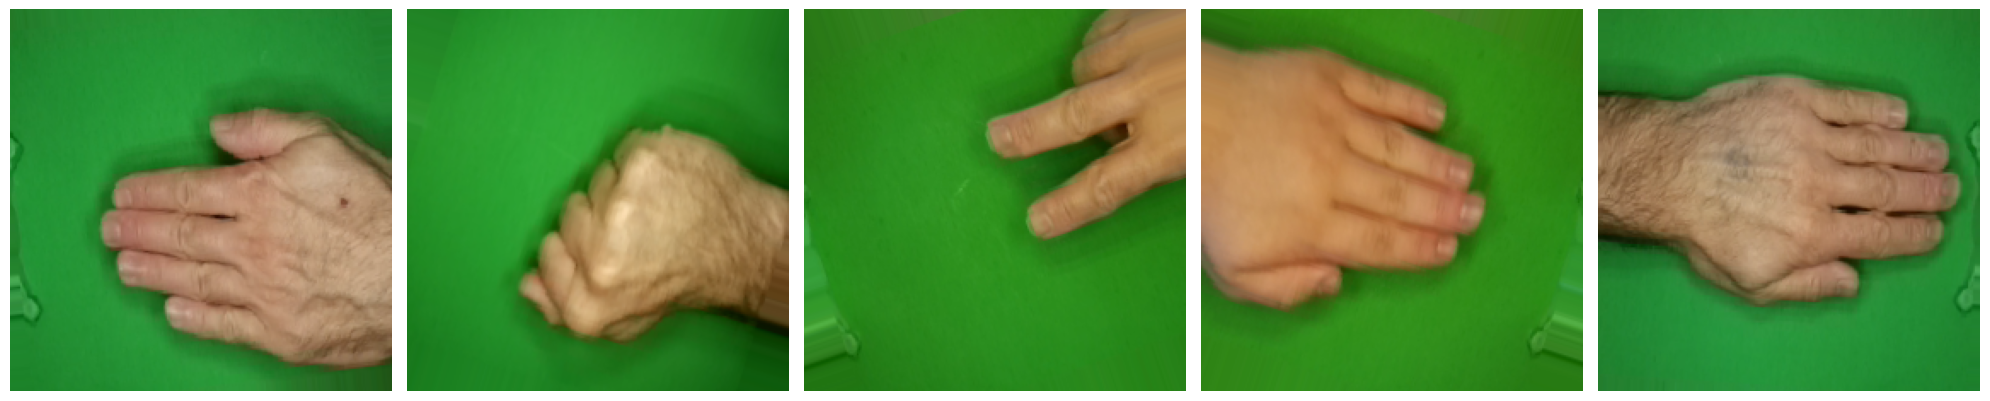

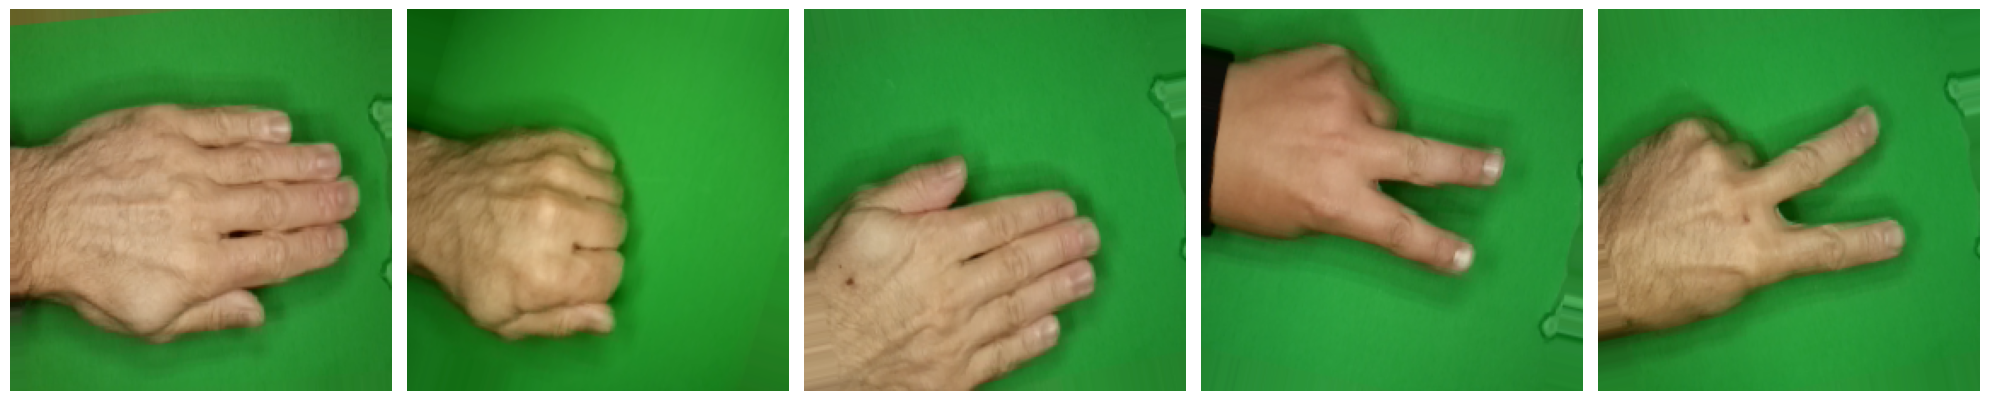

In [14]:
plotImages(train_images[:5])
plotImages(validation_images[:5])

In [15]:
# Melatih model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20


25/25 - 37s - loss: 1.0787 - accuracy: 0.4412 - val_loss: 0.8910 - val_accuracy: 0.5625 - 37s/epoch - 1s/step
Epoch 2/20
25/25 - 35s - loss: 0.7494 - accuracy: 0.6950 - val_loss: 0.5581 - val_accuracy: 0.7437 - 35s/epoch - 1s/step
Epoch 3/20
25/25 - 33s - loss: 0.3731 - accuracy: 0.8562 - val_loss: 0.3606 - val_accuracy: 0.8687 - 33s/epoch - 1s/step
Epoch 4/20
25/25 - 30s - loss: 0.2759 - accuracy: 0.9087 - val_loss: 0.2425 - val_accuracy: 0.9250 - 30s/epoch - 1s/step
Epoch 5/20
25/25 - 32s - loss: 0.2038 - accuracy: 0.9262 - val_loss: 0.2113 - val_accuracy: 0.9187 - 32s/epoch - 1s/step
Epoch 6/20
25/25 - 32s - loss: 0.2120 - accuracy: 0.9337 - val_loss: 0.1665 - val_accuracy: 0.9625 - 32s/epoch - 1s/step
Epoch 7/20
25/25 - 33s - loss: 0.1900 - accuracy: 0.9425 - val_loss: 0.2593 - val_accuracy: 0.9000 - 33s/epoch - 1s/step
Epoch 8/20
25/25 - 30s - loss: 0.2011 - accuracy: 0.9250 - val_loss: 0.1701 - val_accuracy: 0.9375 - 30s/epoch - 1s/step
Epoch 9/20
25/25 - 31s - loss:

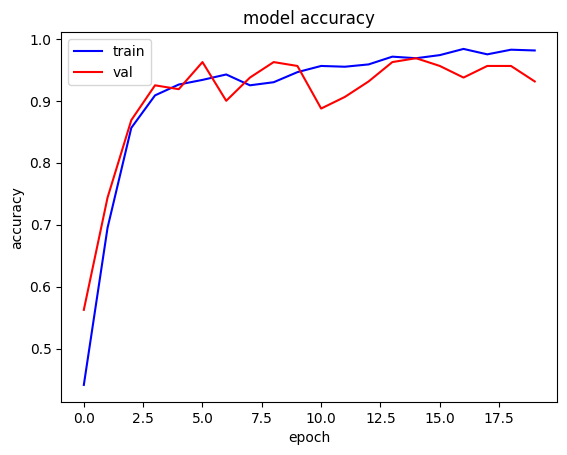

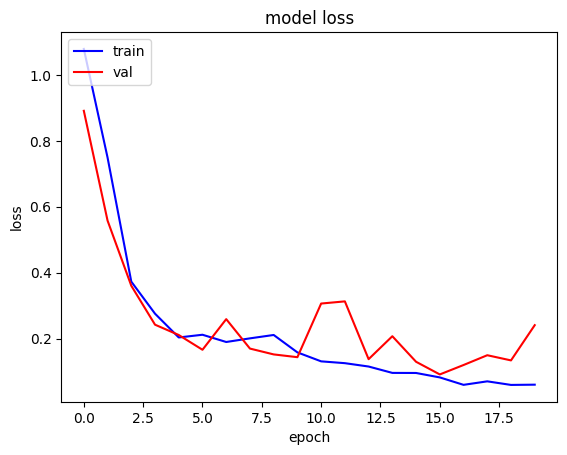

In [37]:
# Plot akurasi dan loss model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
# import matplotlib.image as mpimg
# from google.colab import files
# %matplotlib inline

In [56]:

# Membaca file dari folder dataset
dataset_folder = './dataset/rockpaperscissors/rps-cv-images'
files = os.listdir(dataset_folder)

for fn in files:
    # Memprediksi gambar
    path = os.path.join(dataset_folder, fn)
    img = image.load_img(path, target_size=(224, 224))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0, 0] != 0:
        print('paper')
    elif classes[0, 1] != 0:
        print('rock')
    else:
        print('scissors')


1/1 [==============================] - 0s 51ms/step
04l5I8TqdzF9WDMJ.png
paper
1/1 [==============================] - 0s 50ms/step
0a3UtNzl5Ll3sq8K.png
paper
1/1 [==============================] - 0s 48ms/step
0cb6cVL8pkfi4wF6.png
paper
1/1 [==============================] - 0s 53ms/step
0eqArS2GgsBeqgSn.png
scissors
1/1 [==============================] - 0s 52ms/step
0Og76sl5CJhbxWWx.png
paper
1/1 [==============================] - 0s 57ms/step
0RA9rcrv8iVvuDDU.png
paper
1/1 [==============================] - 0s 59ms/step
0t08v9bAaA0mXGCQ.png
rock
1/1 [==============================] - 0s 48ms/step
0Uomd0HvOB33m47I.png
paper
1/1 [==============================] - 0s 54ms/step
0vugygEjxQJPr9yz.png
paper
1/1 [==============================] - 0s 95ms/step
0zKU6wEhT2cDe9j0.png
paper
1/1 [==============================] - 0s 52ms/step
14K62H4KG1hg5qiJ.png
paper
1/1 [==============================] - 0s 48ms/step
1Dfw5FRlS4h60JPX.png
paper
1/1 [==============================] - 0s 53ms/ste

In [20]:
# from tensorflow.keras.preprocessing import image
# import numpy as np

# uploaded = files.upload()

# for fn in uploaded.keys():

#   # predicting images
#   path = fn
#   img = image.load_img(path, target_size=(224,224))
#   # img = image.load_img(path, target_size=(150,150))
#   imgplot = plt.imshow(img)
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)

#   print(fn)
#   if classes[0,0]!=0:
#     print('paper')
#   elif classes[0,1]!=0:
#     print('rock')
#   else:
#     print('scissors')


AttributeError: 'list' object has no attribute 'upload'